In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Data Analysis on training set

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Target Variable (Survived)**

In [7]:
train_df['Survived'].value_counts(normalize = True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Target class is balanced

**Pclass Feature**

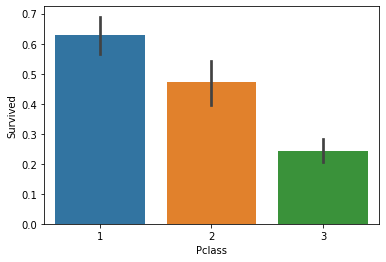

In [8]:
sns.barplot(x='Pclass', y = 'Survived' , data = train_df )

**Sex Feature**

In [9]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

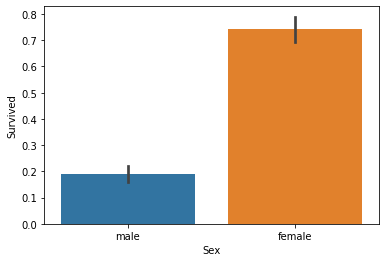

In [10]:
sns.barplot(x='Sex', y = 'Survived' , data = train_df )

In [11]:
print(train_df['Age'].value_counts(dropna = False))
print(train_df['Age'].nunique())

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64
88


**SibSp Feature**

In [12]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

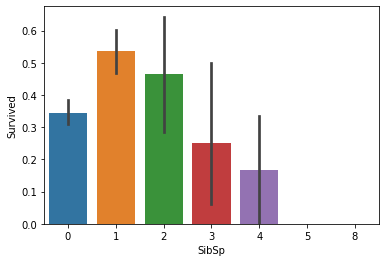

In [13]:
sns.barplot(x='SibSp', y = 'Survived' , data = train_df )

**Parch Feature**

In [14]:
train_df['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

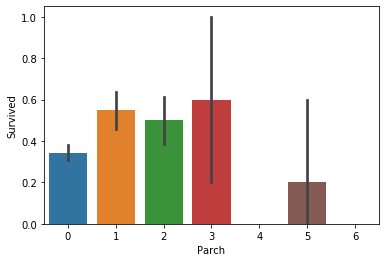

In [15]:
sns.barplot(x='Parch', y = 'Survived' , data = train_df )

**Fare Feature**

In [16]:
print(train_df['Fare'].value_counts())
print(train_df['Fare'].nunique())

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
248


**Embarked Feature**

In [17]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

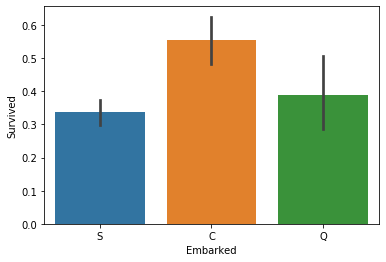

In [18]:
sns.barplot(x='Embarked', y = 'Survived' , data = train_df )

# Data Preprocessing

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
train_df.drop(['Cabin','Ticket'],axis = 1, inplace = True)
test_df.drop(['Cabin','Ticket'],axis = 1, inplace = True)

In [23]:
train_df['Embarked'].fillna("S", inplace = True)

In [24]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Rev'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Lady','Sir','Countess','Major'],'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme','Ms'],'Mrs')                                          

train_df.groupby('Title',as_index= False)['Survived'].mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.795276
4,Rare,0.222222
5,Royal,0.800000


In [26]:
#tittle mapping
title_mapping = {'Master': 1,'Miss':2,'Mr':3,'Mrs':4, 'Rare':5, 'Royal': 6}
train_df['Title']= train_df['Title'].map(title_mapping)
test_df['Title']= test_df['Title'].map(title_mapping)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3


In [27]:
#Embarked mapping and sex mapping
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':1, 'C':2, 'Q':3})
    dataset['Sex'] = dataset['Sex'].map({'male':1, 'female':2})

In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,71.2833,2,4
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,53.1000,1,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,3


In [29]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,7.0000,1,4.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3,3.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,12.2875,1,4.0


In [30]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           1
dtype: int64

In [31]:
test_df['Title'].fillna(3.0,inplace = True )

In [32]:
test_df['Fare'].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [33]:
test_df['Fare'].fillna(7.7500, inplace = True)

In [34]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
Title           0
dtype: int64

In [35]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
dtype: int64

In [36]:
#drop Name column 
for dataset in combine:
    dataset.drop('Name',axis = 1, inplace = True)

In [37]:
train_df['Fareband'] = pd.qcut(train_df['Fare'],4)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fareband
0,1,0,3,1,22.0,1,0,7.2500,1,3,"(-0.001, 7.91]"
1,2,1,1,2,38.0,1,0,71.2833,2,4,"(31.0, 512.329]"
2,3,1,3,2,26.0,0,0,7.9250,1,2,"(7.91, 14.454]"
3,4,1,1,2,35.0,1,0,53.1000,1,4,"(31.0, 512.329]"
4,5,0,3,1,35.0,0,0,8.0500,1,3,"(7.91, 14.454]"


In [38]:
train_df.groupby(train_df['Fareband'],as_index = False)['Survived'].mean()

,Fareband,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [39]:
for dataset in combine:
    dataset.loc[dataset['Fare']  <= 7.91, 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454),'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 31.0) & (dataset['Fare'] <= 512.329), 'Fare'] = 4
    dataset['Fare']= dataset['Fare'].astype(int)

In [40]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fareband
0,1,0,3,1,22.0,1,0,1,1,3,"(-0.001, 7.91]"
1,2,1,1,2,38.0,1,0,4,2,4,"(31.0, 512.329]"
2,3,1,3,2,26.0,0,0,2,1,2,"(7.91, 14.454]"
3,4,1,1,2,35.0,1,0,4,1,4,"(31.0, 512.329]"
4,5,0,3,1,35.0,0,0,2,1,3,"(7.91, 14.454]"


In [41]:
train_df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [42]:
train_df['Age'][train_df['Age'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [43]:
#filling missing age value 
for dataset in combine:
    avg_age = dataset['Age'].mean()
    std_age = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint( avg_age - std_age, avg_age + std_age, size = age_null_count)
    
    dataset['Age'][ dataset['Age'].isnull()] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)   

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [44]:
train_df['Ageband'] = pd.cut(train_df['Age'], 5)
train_df.groupby(train_df['Ageband'], as_index = False)['Survived'].mean()

,Survived
0,0.518182
1,0.345291
2,0.392157
3,0.434783
4,0.090909


In [45]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16.0 , 'Age'] = 1
    dataset.loc[(dataset['Age'] >16.0 ) & (dataset['Age'] <=32.0),'Age'] = 2
    dataset.loc[(dataset['Age'] >32.0 ) & (dataset['Age'] <=48.0), 'Age'] = 3
    dataset.loc[(dataset['Age'] >48.0 ) & (dataset['Age'] <=64.0), 'Age'] = 4
    dataset.loc[(dataset['Age'] >64.0 ) & (dataset['Age'] <=80.0), 'Age'] = 5
    dataset['Age'] = dataset['Age'].astype(int)
    

In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fareband,Ageband
0,1,0,3,1,2,1,0,1,1,3,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,2,3,1,0,4,2,4,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,2,2,0,0,2,1,2,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,2,3,1,0,4,1,4,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,1,3,0,0,2,1,3,"(7.91, 14.454]","(32.0, 48.0]"


In [47]:
for dataset in combine:
    dataset.drop('Ageband', axis =1 , inplace = True)

KeyError: "['Ageband'] not found in axis"

In [48]:
train_df.drop('Fareband', axis =1 ,inplace =True)

In [49]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,2,1,0,1,1,3
1,2,1,1,2,3,1,0,4,2,4
2,3,1,3,2,2,0,0,2,1,2
3,4,1,1,2,3,1,0,4,1,4
4,5,0,3,1,3,0,0,2,1,3


In [50]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,3,0,0,1,3,3.0
1,893,3,2,3,1,0,1,1,4.0
2,894,2,1,4,0,0,2,3,3.0
3,895,3,1,2,0,0,2,1,3.0
4,896,3,2,2,1,1,2,1,4.0


In [51]:
test_df['Title'] = test_df['Title'].astype(int)

In [52]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,3,0,0,1,3,3
1,893,3,2,3,1,0,1,1,4
2,894,2,1,4,0,0,2,3,3
3,895,3,1,2,0,0,2,1,3
4,896,3,2,2,1,1,2,1,4


# Choose the best model

**Splitting the training dataset**

In [53]:
X = train_df.drop(['PassengerId','Survived'], axis =1)
y = train_df['Survived']

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,y,stratify = y, random_state = 0)


**Logistic Regression**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
lr = LogisticRegression(penalty = 'l2', C =0.1)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(accuracy_score(y_val,y_pred))

0.7713004484304933


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Decision Tree**

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_val)
print(accuracy_score(y_val,y_pred))

0.7937219730941704


**SVM**

In [57]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_val)
print(accuracy_score(y_val,y_pred))

0.820627802690583


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**Naive Baiyes**

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred  = gnb.predict(x_val)
print(accuracy_score(y_val,y_pred))

0.7219730941704036


**Random Forest**

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_val)
print(accuracy_score(y_val,y_pred))

0.820627802690583


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**XGBoost**

In [60]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_val)
print(accuracy_score(y_val,y_pred)*100)

80.71748878923766


# Creating Submission file

In [ ]:
#set ids as PassengerId and predict survival
ids = test_df['PassengerId']
predictions = xgb.predict(test_df.drop('PassengerId', axis =1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({'PassengerId':ids, 'Survived':predictions})
output.to_csv('Submission.csv',index = False)